<a href="https://colab.research.google.com/github/erick1439/CAP4630-Wocjan/blob/master/HW_2/Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 2**

## ***Description:***

Extend the code for mini-batch gradient descent in the notebook linear_regression_gradient_descent.ipynb to the case n=2, that is, the model parameters are the two weights w1 and w2 and the bias term b. (You can remove the code for batch-gradient descent and stochastic gradient descent.) Make sure that your code is vectorized.

To solve this problem, you have to create data points that approximately lie on a 2D plane, display these points, and display the predictions of your model after tuning the parameters with gradient descent.

## ***Implementation:***

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
# Additional and original data is being generated.

np.random.seed(42)
xs = 2 * np.random.rand(100, 1)
zs = 2 * np.random.rand(100, 1)
ys = 4 + 3 * xs + np.random.rand(100, 1)

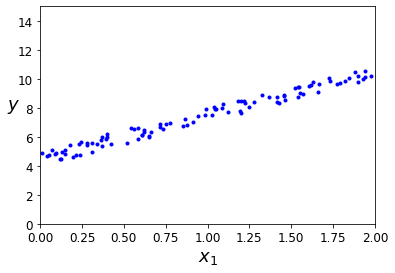

In [100]:
# Plotting the original data

plt.plot(xs, ys, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

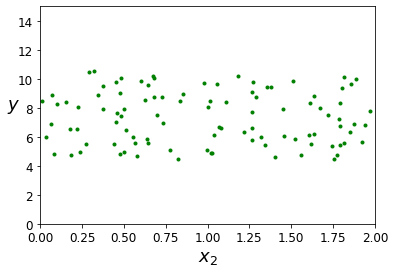

In [101]:
# Plotting the additional data
plt.plot(zs, ys, "g.")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
# split the data into training and test sets
# train set
train_xs = xs[:80]
train_ys = ys[:80]
train_zs = zs[:80]
# test set
test_xs = xs[80:]
test_ys = ys[80:]
test_zs = zs[80:]

### Linear regression

In [0]:
# number of epochs
epochs = 10
# learning rate
lr = 0.01

In [0]:
# initial value for weight w and bias b
w2 = np.random.randn(1)
w1 = np.random.randn(1)
b = np.zeros(1)

In [0]:
# Used to calculate the gradient for both sets of data
for epoch in np.arange(epochs):
  for i in np.arange(80):
    y_pred = w1 * train_xs[i] + w2 * train_zs[i] + b
    
    grad_w1 = (y_pred - train_ys[i]) * train_xs[i]
    grad_w2 = (y_pred - train_ys[i]) * train_zs[i]
    grad_b = (y_pred - train_ys[i])
    
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
    b -= lr * grad_b

In [0]:
test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w1 * test_xs[i] + w2 *test_zs[i] + b - test_ys[i]) ** 2
test_loss /= 20

In [107]:
test_loss

array([0.09560399])

In [0]:
pred_ys = w1 * test_xs + w2 * test_zs + b

## ***Output:***

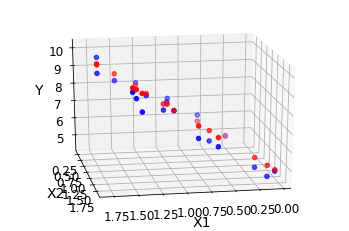

In [109]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(test_xs, test_zs, test_ys, c='b', marker='o')
ax.scatter(test_xs, test_zs, pred_ys, c='r', marker='o') # predicted values

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(20, 80)

plt.show()

## ***Resources:***

https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-